In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('reviews.csv',parse_dates = ['Timestamp']) 
# (need to tell pandas to interpret 'timestamp' column as timestamp, otherwise it will be read as a string
data.head(10)

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN
5,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 01:10:06+00:00,4.5,NaN
6,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 00:44:54+00:00,4.5,NaN
7,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 23:42:02+00:00,5.0,NaN
8,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 21:58:40+00:00,5.0,NaN
9,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 20:13:27+00:00,5.0,NaN


## What day of the week are people happiest?

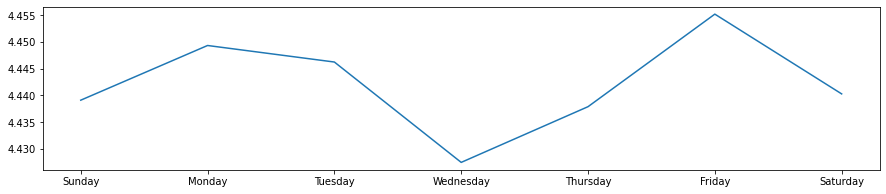

In [20]:
data['DayOfWeek'] = data['Timestamp'].dt.strftime('%A') # this extracts day of week as a string
# in order to sort by day, we need a numeric value, otherwise days are sorted alphabetically
data['DayNumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['DayNumber','DayOfWeek']).mean()
weekday_average.head(10)

# need to order by weekday column.
weekday_average = weekday_average.sort_values('DayNumber')

# plt.plot can take 'index' as an axis, but in this case we have two values, so need to specify which one we want
plt.figure(figsize=[15,3])
plt.plot(weekday_average.index.get_level_values(1), weekday_average['Rating'])

In [22]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_docstrings',
 '_warn_if_gui_ou

## Create a pie chart from the number of ratings for each course 

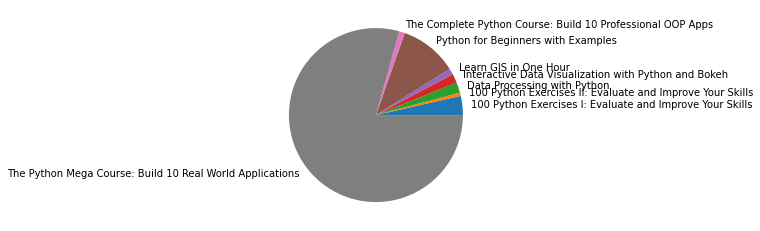

In [28]:
share = data.groupby(['Course Name'])['Rating'].count()

plt.pie(share, labels=share.index); # include the semicolon to remove the metadata